<a href="https://colab.research.google.com/github/JamesLeeeeeee/machineLearning_practice/blob/master/20211103_%EC%9D%B4%EC%9E%AC%EA%B4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#9-2

In [1]:
from tensorflow.keras.datasets import imdb
(train_input,train_target), (test_input, test_target)= imdb.load_data(num_words=500)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
train_input[0]

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,


In [5]:
print(len(train_input[0]))

218


In [6]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target= train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [9]:
import numpy as np
lengths= np.array([len(x) for x in train_input])

In [10]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


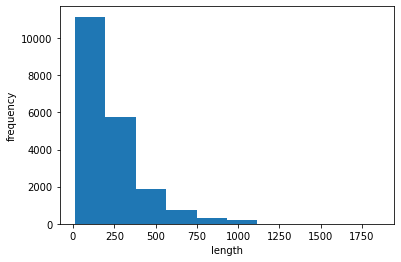

In [11]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq= pad_sequences(train_input, maxlen=100)

In [13]:
print(train_seq.shape)

(20000, 100)


In [14]:
print(len(train_seq[0]))

100


In [15]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [16]:
val_seq= pad_sequences(val_input, maxlen=100)

In [17]:
from tensorflow import keras
model= keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [18]:
train_oh= keras.utils.to_categorical(train_seq)

In [19]:
print(train_oh.shape)

(20000, 100, 500)


In [20]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [24]:
print(np.sum(train_oh[0][0]))

1.0


In [25]:
val_oh= keras.utils.to_categorical(val_seq)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [28]:
rmsprop= keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss ='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb= keras.callbacks.EarlyStopping(patience=3, restore_best_weights= True)
history=model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), 
                  callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 41ms/step - loss: 0.6996 - accuracy: 0.4996 - val_loss: 0.6961 - val_accuracy: 0.5224
Epoch 2/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6960 - accuracy: 0.5085 - val_loss: 0.6947 - val_accuracy: 0.5148
Epoch 3/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6935 - accuracy: 0.5151 - val_loss: 0.6935 - val_accuracy: 0.5168
Epoch 4/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6915 - accuracy: 0.5215 - val_loss: 0.6924 - val_accuracy: 0.5168
Epoch 5/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6898 - accuracy: 0.5293 - val_loss: 0.6915 - val_accuracy: 0.5220
Epoch 6/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6882 - accuracy: 0.5386 - val_loss: 0.6906 - val_accuracy: 0.5242
Epoch 7/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6866 - accuracy: 0.5461 - val_loss: 0.6897 - val_ac

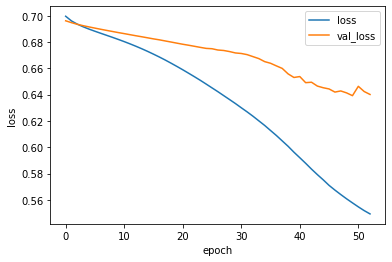

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [30]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


In [31]:
model2= keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [32]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [34]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint=keras.callbacks.ModelCheckpoint('best-embedding-model.h5',save_best_only=True)
early_stopping=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history=model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint, early_stopping])

Epoch 1/100
313/313 [==============================] - 8s 23ms/step - loss: 0.6927 - accuracy: 0.5184 - val_loss: 0.6847 - val_accuracy: 0.5500
Epoch 2/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6763 - accuracy: 0.5894 - val_loss: 0.6571 - val_accuracy: 0.6486
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6172 - accuracy: 0.6975 - val_loss: 0.5968 - val_accuracy: 0.7158
Epoch 4/100
313/313 [==============================] - 7s 24ms/step - loss: 0.5784 - accuracy: 0.7386 - val_loss: 0.5701 - val_accuracy: 0.7384
Epoch 5/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5530 - accuracy: 0.7564 - val_loss: 0.5574 - val_accuracy: 0.7432
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5332 - accuracy: 0.7674 - val_loss: 0.5339 - val_accuracy: 0.7660
Epoch 7/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5194 - accuracy: 0.7725 - val_loss: 0.5238 - val_accuracy:

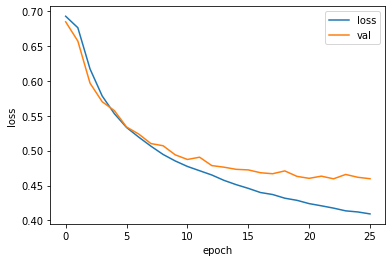

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','val'])
plt.show()

In [38]:
160+(16*16)+16

432

# 9-3

In [39]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target)= imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target= train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [40]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq= pad_sequences(train_input, maxlen=100)
val_seq=pad_sequences(val_input, maxlen=100)

In [43]:
from tensorflow import keras
model= keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [46]:
rmsprop= keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint=keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history=model.fit(train_seq, train_target, epochs=100, batch_size=64, 
                  validation_data=(val_seq, val_target),callbacks=[checkpoint, early_stopping])

Epoch 1/100
313/313 [==============================] - 16s 44ms/step - loss: 0.6923 - accuracy: 0.5537 - val_loss: 0.6911 - val_accuracy: 0.6048
Epoch 2/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6885 - accuracy: 0.6332 - val_loss: 0.6845 - val_accuracy: 0.6572
Epoch 3/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6691 - accuracy: 0.6629 - val_loss: 0.6369 - val_accuracy: 0.7028
Epoch 4/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6063 - accuracy: 0.7240 - val_loss: 0.5898 - val_accuracy: 0.7276
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5772 - accuracy: 0.7416 - val_loss: 0.5730 - val_accuracy: 0.7348
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5574 - accuracy: 0.7531 - val_loss: 0.5582 - val_accuracy: 0.7424
Epoch 7/100
313/313 [==============================] - 13s 43ms/step - loss: 0.5401 - accuracy: 0.7623 - val_loss: 0.5405 - val_ac

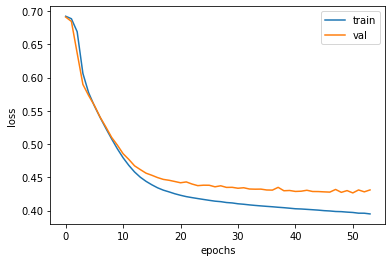

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [48]:
model2=keras.Sequential()
model2.add(keras.layers.Embedding(500,16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [49]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint=keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history= model2.fit(train_seq, train_target, epochs=100, batch_size=64, 
                    validation_data=(val_seq, val_target),callbacks=[checkpoint, early_stopping])

Epoch 1/100
313/313 [==============================] - 16s 45ms/step - loss: 0.6925 - accuracy: 0.5197 - val_loss: 0.6917 - val_accuracy: 0.5622
Epoch 2/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6908 - accuracy: 0.5682 - val_loss: 0.6898 - val_accuracy: 0.6030
Epoch 3/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6880 - accuracy: 0.6014 - val_loss: 0.6862 - val_accuracy: 0.6192
Epoch 4/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6824 - accuracy: 0.6248 - val_loss: 0.6790 - val_accuracy: 0.6300
Epoch 5/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6717 - accuracy: 0.6463 - val_loss: 0.6644 - val_accuracy: 0.6496
Epoch 6/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6468 - accuracy: 0.6682 - val_loss: 0.6262 - val_accuracy: 0.6824
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5851 - accuracy: 0.7088 - val_loss: 0.5598 - val_ac

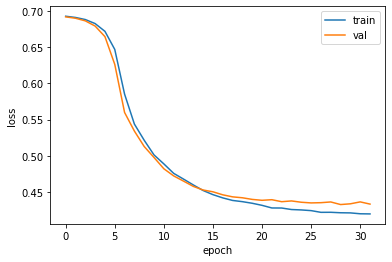

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
mode